In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 4.3MB 44.3MB/s 
     |████████████████████████████████| 501kB 63.2MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Counting objects: 100% (27577/27577), done.
remote: Compressing objects: 100% (27576/27576), done.
remote: Total 27577 (delta 3), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27577/27577), 331.67 MiB | 55.86 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [0]:
width = 64
height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [0]:
trainDatagen = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [0]:
valDatagen = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =5,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 66s 48ms/step - loss: 0.5728 - accuracy: 0.6997 - val_loss: 0.3243 - val_accuracy: 0.9234
Epoch 2/5
1378/1378 [==============================] - 59s 43ms/step - loss: 0.2372 - accuracy: 0.9161 - val_loss: 0.1810 - val_accuracy: 0.9354
Epoch 3/5
1378/1378 [==============================] - 59s 43ms/step - loss: 0.2051 - accuracy: 0.9361 - val_loss: 0.1932 - val_accuracy: 0.9396
Epoch 4/5
1378/1378 [==============================] - 59s 43ms/step - loss: 0.1890 - accuracy: 0.9426 - val_loss: 0.1905 - val_accuracy: 0.9430
Epoch 5/5
1378/1378 [==============================] - 59s 43ms/step - loss: 0.1805 - accuracy: 0.9468 - val_loss: 0.1966 - val_accuracy: 0.9258


In [0]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

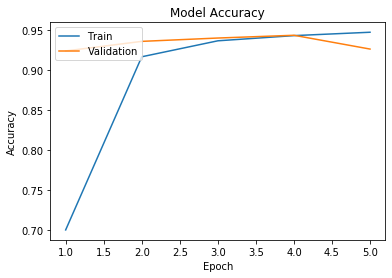

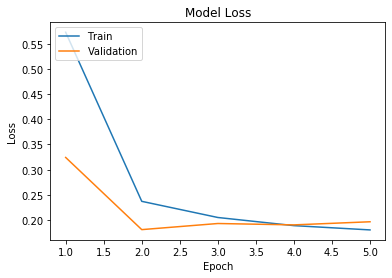

In [0]:
plotLearningCurve(history,5)